## Analyse des sentiments

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re

In [2]:
BASE_DIR = '../../../Data/appdata/rotten/'

In [3]:
#!pip install transformers
from transformers import pipeline
sentiment_pipeline = pipeline("sentiment-analysis")

In [4]:
users_output_df = pd.read_csv(BASE_DIR + 'users_output.csv')
users_output_df.head(5)

In [5]:
users_output_df = users_output_df[['movieID', 'userID', 'target']]
users_output_df.dropna(inplace=True)
users_output_df.head(5)

In [6]:
users_output_df['sentiment_analysis'] = sentiment_pipeline(users_output_df['target'].tolist())
users_output_df['sentiment_label'] = users_output_df['sentiment_analysis'].apply(lambda x : x['label'])
users_output_df['sentiment_score'] = users_output_df['sentiment_analysis'].apply(lambda x : x['score'])

In [7]:
final_df = users_output_df[['movieID', 'userID', 'target', 'sentiment_label', 'sentiment_score']] 
final_df.head(5)

In [8]:
final_df.to_csv(BASE_DIR + 'users_sentiment_output.csv', index=True)

### Analyse des résultats

In [9]:
users_sentiment_output_df = pd.read_csv(BASE_DIR + 'users_sentiment_output.csv', index_col=0)
users_sentiment_output_df.head(5)

,movieID,userID,target,sentiment_label,sentiment_score
0,m/0814255,u/Andrew_L._Urban,A fantasy adventure that fuses Greek mythology...,POSITIVE,0.999749
1,m/0814255,u/Louise_Keller,"Uma Thurman as Medusa, the gorgon with a coiff...",POSITIVE,0.999734
2,m/0814255,u/nan,With a top-notch cast and dazzling special eff...,POSITIVE,0.999808
3,m/0814255,u/Ben_McEachen,Whether audiences will get behind The Lightnin...,POSITIVE,0.917088
4,m/0814255,u/Ethan_Alter,What's really lacking in The Lightning Thief i...,POSITIVE,0.735963


In [10]:
corpus_pos = ' '.join(users_sentiment_output_df[
    users_sentiment_output_df['sentiment_label'] == 'POSITIVE']['target'].tolist())
corpus_neg = ' '.join(users_sentiment_output_df[
    users_sentiment_output_df['sentiment_label'] != 'POSITIVE']['target'].tolist())

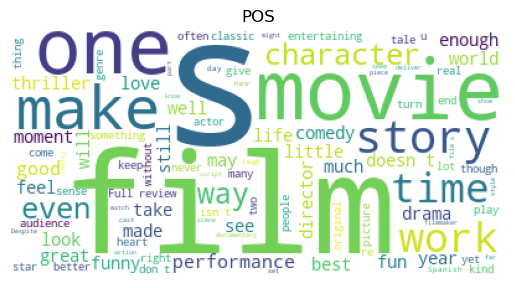

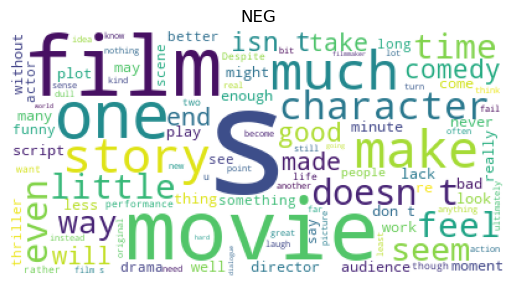

In [11]:
from wordcloud import WordCloud
from wordcloud import STOPWORDS

punctuation = r"[\!\"\#\$\%\&\'\(\)\*\+\,\-\.\/\:\;\<\=\>\?\@\[\\\]\^\_\`\{\|\}\~\n\t]"

for sent, corpus in zip(['POS', 'NEG'], [corpus_pos, corpus_neg]):
    corpus = re.sub('( )+', ' ', re.sub(punctuation, " ", corpus))
    wordcloud = WordCloud(background_color='white', stopwords = STOPWORDS, max_words=100).generate(corpus) 
    plt.figure()
    plt.title(sent)
    plt.imshow(wordcloud)
    plt.axis("off")

In [18]:
len(users_sentiment_output_df)

111757

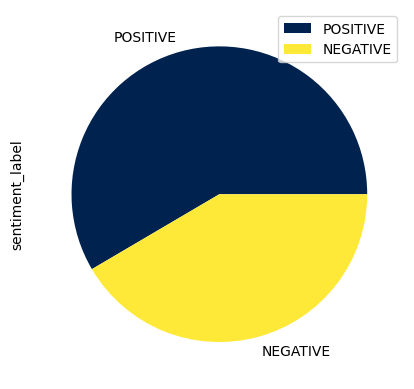

In [35]:
users_sentiment_output_df['sentiment_label'].value_counts().plot.pie(cmap='cividis')
plt.legend()
plt.show()